In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import pickle

#Import data
wine_df = pd.read_csv('winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,NaN,NaN,Douro,Portugal,Quinta dos Avidagos
1,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,NaN,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
2,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,NaN,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,NaN,Michigan,US,St. Julian
3,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
4,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,NaN,Northern Spain,Spain,Tandem


In [3]:
wine_df.describe(include=['O'],).T

,count,unique,top,freq
title,111511,110556,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,9
description,111511,111511,"This blend of Mourvèdre, Carignane and Syrah i...",1
taster_name,88244,19,Roger Voss,18543
taster_twitter_handle,83761,15,@vossroger,18543
designation,79472,35746,Reserve,1844
variety,111511,691,Pinot Noir,11832
region_1,93556,1204,Napa Valley,4170
region_2,46559,17,Central Coast,10149
province,111511,422,California,33520
country,111511,42,US,50229


/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


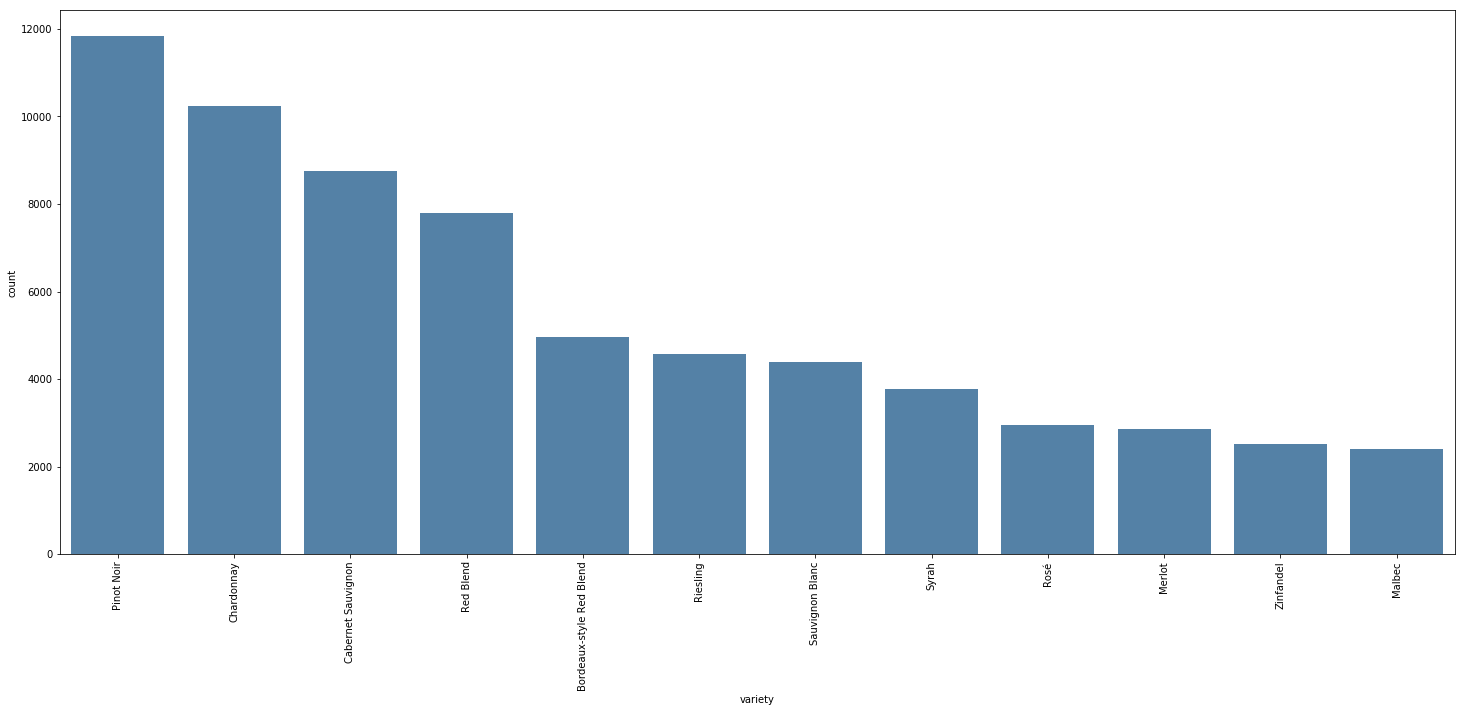

In [8]:
v_df = wine_df.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = v_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = v_df['variety'], order = varieties, ax = ax, color = 'steelblue')
plt.xticks(rotation = 90)
plt.show()

In [5]:
v_df['variety'].unique()

array(['Riesling', 'Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay',
       'Malbec', 'Red Blend', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Rosé', 'Zinfandel', 'Syrah'], dtype=object)

In [6]:
v_df.head(2)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
2,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,NaN,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,NaN,Michigan,US,St. Julian
3,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [7]:
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(['flavor','flavors','nose','aromas','finish','palate', 'alongside','offers','feels','notes','structure','like','well'])
stopwords2

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenizer2(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [49]:
vectorizer = TfidfVectorizer(stop_words = stopwords2, ngram_range=(3,3), tokenizer = tokenizer2)
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(3, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'aromas', 'finish', 'palate', 'alongside', 'offers', 'feels', 'notes', 'structure', 'like', 'well'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenizer2 at 0x1168ea840>, use_idf=True,
        vocabulary=None)

In [50]:
descriptions = v_df['description'].values
descriptions

array([ 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
       "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",
       'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.',
       ...,
       'A bouquet of black cherry, tart cranberry and clove opens into flavors of cherry, anisette, espresso bean and mint, with a hint of tart cranberry. The minty notes can almost seem overly strong for a moment, but tart tones bring the fruit flavors back to t

In [51]:
X = vectorizer.fit_transform(descriptions)
X

<67043x1164421 sparse matrix of type '<class 'numpy.float64'>'
	with 1586719 stored elements in Compressed Sparse Row format>

In [52]:
true_k = 12
kmodel = KMeans(n_clusters=true_k, init='k-means++', max_iter=20, n_init=10)
kmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
kmodel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
order_centroids= kmodel.cluster_centers_.argsort()[:,::-1]
order_centroids

array([[ 792918,  420425, 1018952, ...,  770535,  770534,       0],
       [ 820448,  981906,  283003, ...,  775026,  775025,       0],
       [ 645980, 1034332,  610840, ...,  762607,  762606,       0],
       ..., 
       [ 606020, 1022688,  131166, ...,  774762,  774761,       0],
       [1034718,  411496,  302316, ...,  775774,  775773,       0],
       [ 118563,  159989, 1012004, ...,  772300,  772299,       0]])

In [55]:
terms=vectorizer.get_feature_names()
terms

["' ' cab",
 "' ' columbia",
 "' ' dionysu",
 "' ' ha",
 "' ' j",
 "' ' par",
 "' ' possibl",
 "' ' show",
 "' ' tannic",
 "' ' wine'",
 "' also brim",
 "' amaz dens",
 "' anyth it'",
 "' arguabl best",
 "' ausles sonnenuhr",
 "' auslesen manfr",
 "' back later",
 "' base cabernet",
 "' beat '",
 "' beauti wine",
 "' bell canyon",
 "' best effort",
 "' best ever",
 "' best open",
 "' best yet",
 "' big strong",
 "' biscuiti yeasti",
 "' bit tire",
 "' black cherri",
 "' blend cabernet",
 "' blend malbec",
 "' blend tempranillo",
 "' bone dri",
 "' bordeaux blend",
 "' botella start",
 "' bottl give",
 "' bottl ha",
 "' bottl lean",
 "' bottl rich",
 "' bottl they'r",
 "' bottl thi",
 "' bottl watch",
 "' bottl winery'",
 "' bucklin get",
 "' cab also",
 "' cab franc",
 "' cab littl",
 "' cab quit",
 "' cab sibl",
 "' cab tannic",
 "' cab tough",
 "' cab winemak",
 "' cab wonder",
 "' cabernet nearli",
 "' cabernet red",
 "' cardinal show",
 "' central coast",
 "' certainli better",
 "'

In [56]:
for i in range(true_k):
    print("Cluster %d" %i),
    for ind in order_centroids[i,:12]:
        print('%s'%terms[ind]),
    print
print("\n")
print("Prediction")
Y=vectorizer.transform(["zinfandel"])
prediction=model.predict(Y)
print(prediction)

Cluster 0
red cherri raspberri
full bodi ro
thi full bodi
cherri raspberri it'
plenti red cherri
ripe red cherri
cherri raspberri fruit
aroma red cherri
it' medium bodi
bodi ro made
fine grain tannin
give thi wine
Cluster 1
ripe black cherri
tannin fresh acid
deliv ripe black
palat deliv ripe
offer ripe black
polish tannin fresh
palat offer ripe
black cherri blackberri
cherri crush raspberri
fresh acid drink
dole ripe black
fine grain tannin
Cluster 2
new french oak
thi wine offer
merlot cabernet sauvignon
blackberri black currant
black currant fruit
thi wine show
blend merlot cabernet
cabernet sauvignon cabernet
sauvignon cabernet franc
merlot cabernet franc
bordeaux style blend
cabernet sauvignon petit
Cluster 3
thi open aroma
dri black cherri
palat offer dri
fine grain tannin
offer dri black
firm fine grain
grain tannin drink
cabernet sauvignon thi
alongsid fine grain
black skin fruit
alongsid firm fine
sauvignon thi open
Cluster 4
thi full bodi
full bodi wine
red berri fruit
wine r

NameError: name 'model' is not defined

In [60]:
v_df['cluster']=kmodel.labels_
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Blues')

ax2.set_ylabel('K-Clusters', fontdict = {'size': 20})
ax2.set_xlabel('Wine Varieties', fontdict = {'size': 20})

for label in ax2.get_xticklabels():
    label.set_weight("bold")
    label.set_size(20)
for label in ax2.get_yticklabels():
    label.set_weight("bold")
    label.set_size(20)
        

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


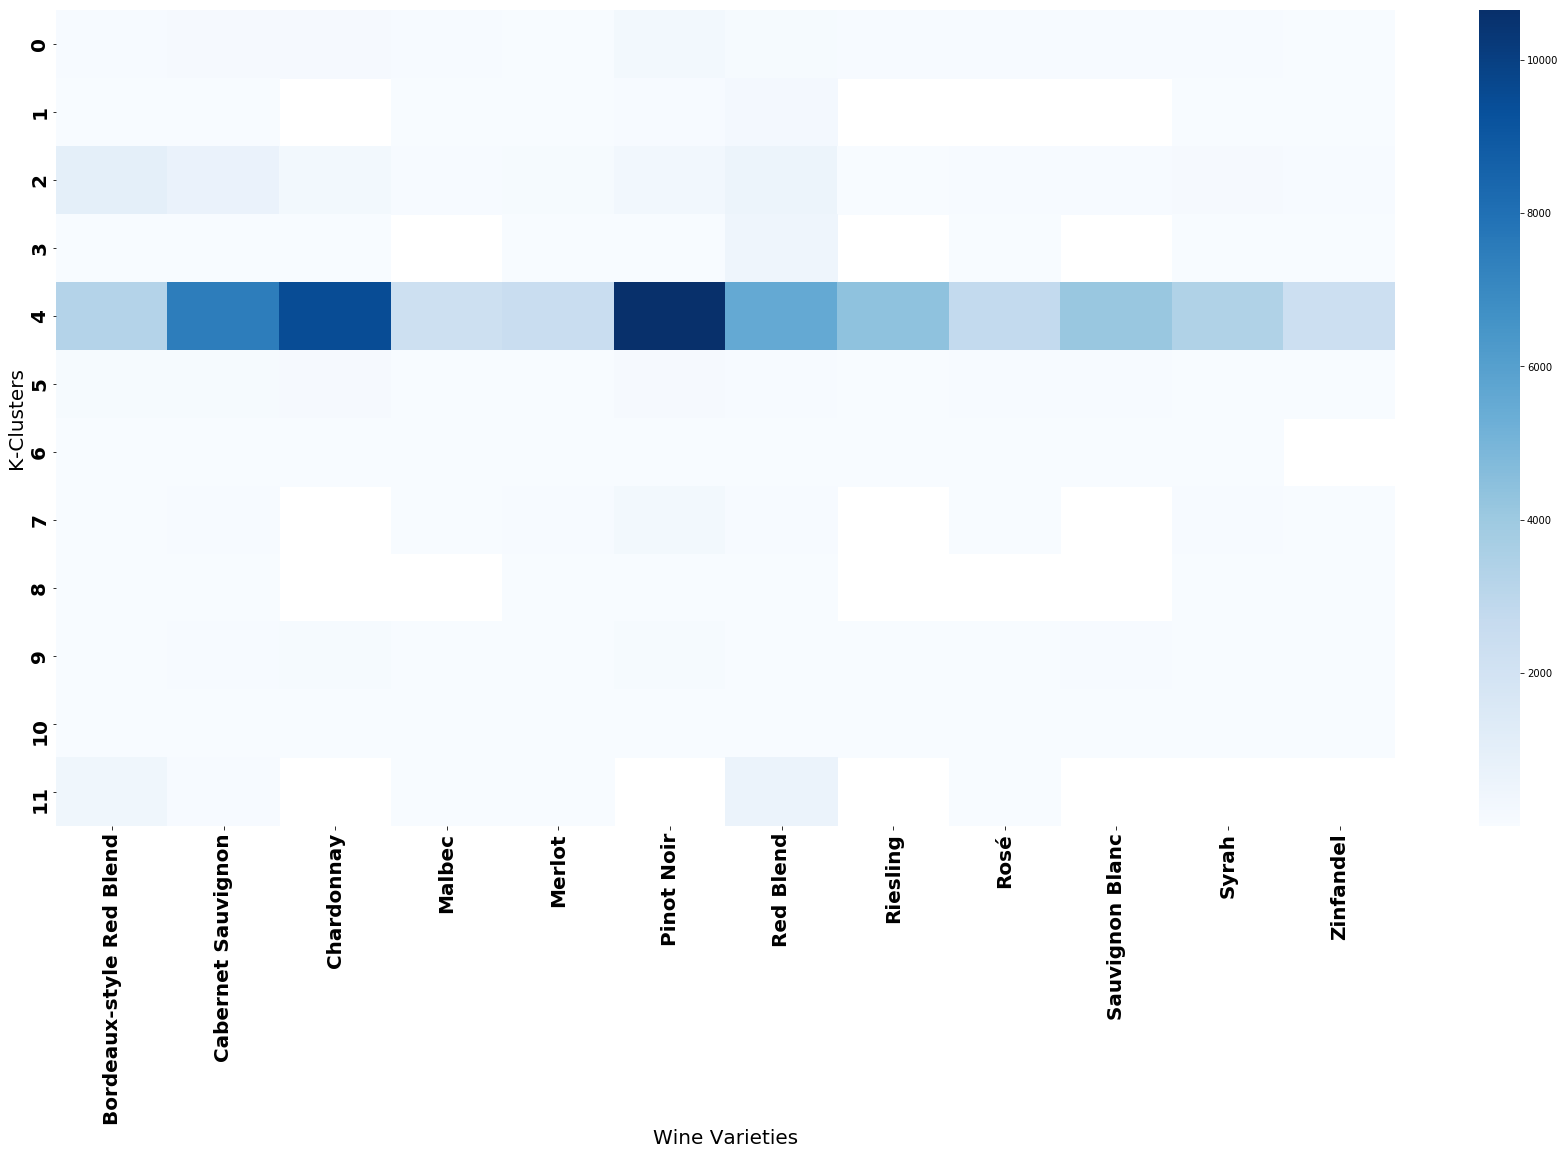

In [61]:
plt.show()

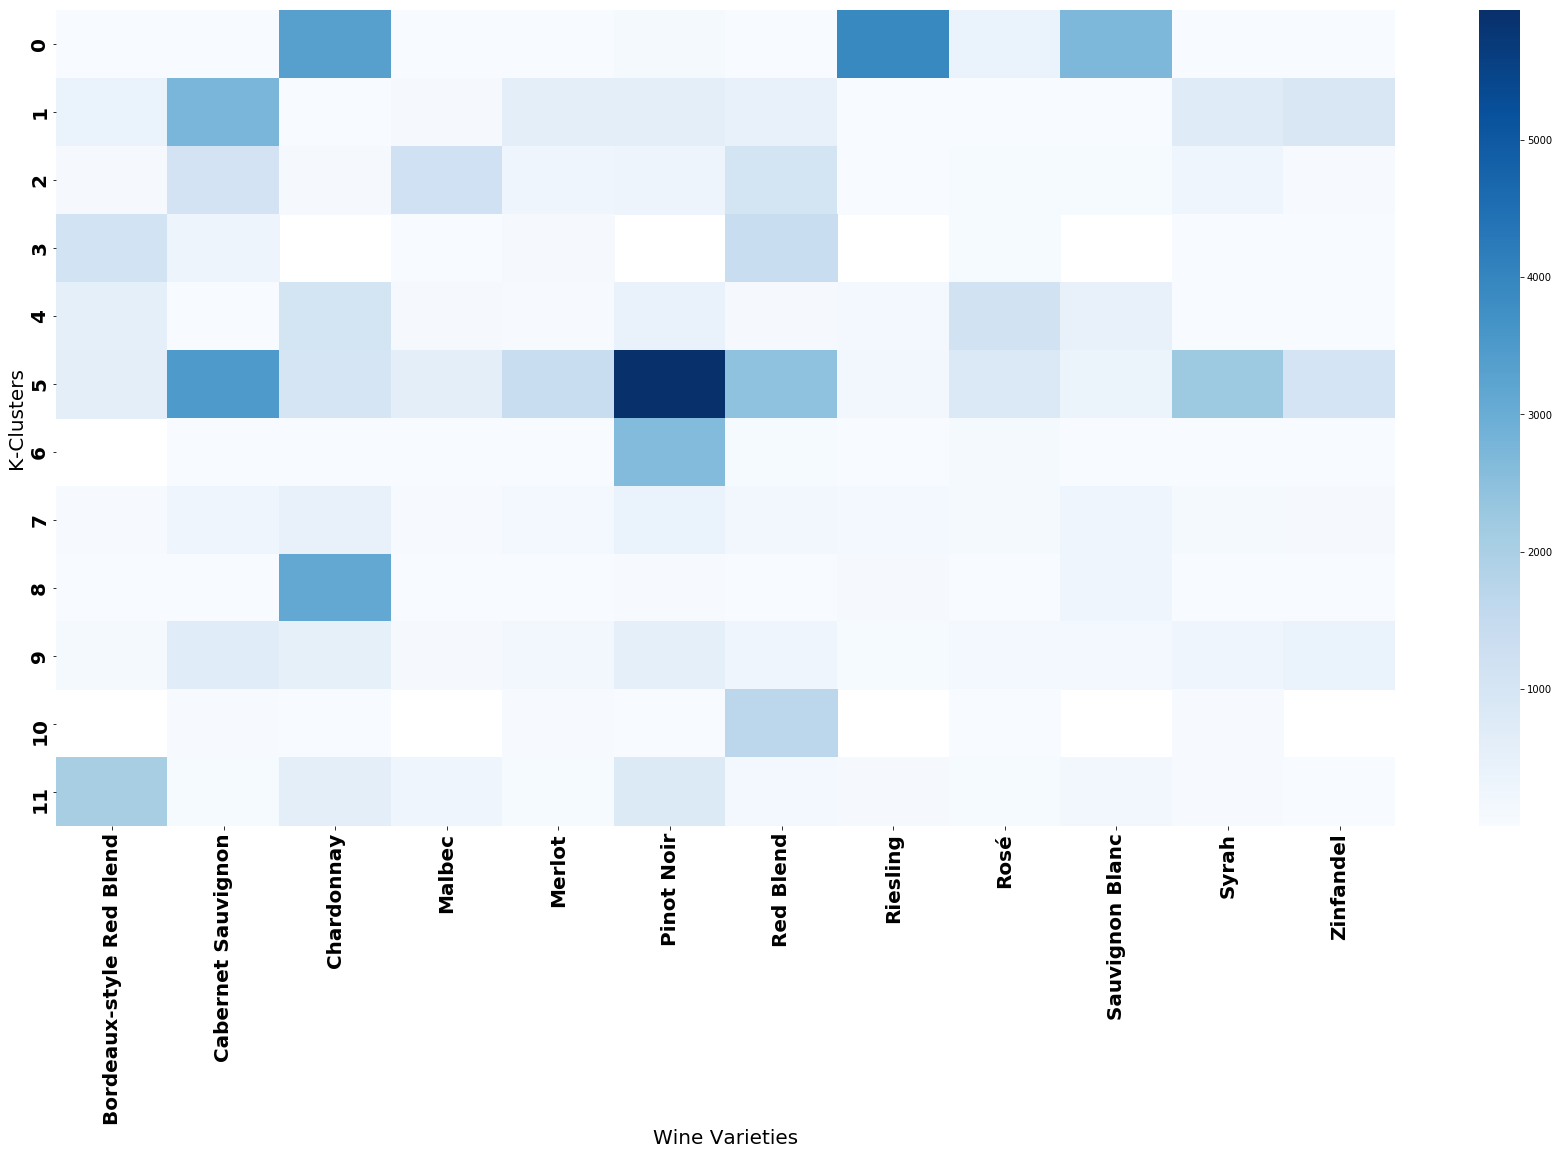

In [30]:
plt.show()

In [45]:
filename = 'kmeansmodel1.pk'
with open(filename, 'wb') as fh:
    pickle.dump(kmodel, fh)

In [48]:
filename = 'vectorizer1.pk'
with open(filename, 'wb') as fh:
    pickle.dump(vectorizer, fh)

In [ ]:
filename = 'kmeansmodel3.pk'
with open(filename, 'rb') as fh:
   b = pickle.load(fh)

In [ ]:
filename = 'vectorizer13.pk'
with open(filename, 'rb') as fh:
   c = pickle.load(fh)

In [ ]:
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(['flavor','flavors','nose','aromas','finish','palate', 'alongside','offers','feels','notes','structure','like','well'])

In [ ]:
print(stopwords2)

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(stop_words = stopwords2, tokenizer = tokenize)
X3 = vectorizer3.fit_transform(descriptions)
words = vectorizer3.get_feature_names()

In [ ]:
words

In [ ]:
kmeans = KMeans(n_clusters = 12, n_init = 5, n_jobs = -1)
kmeans.fit(X3)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [ ]:
v_df['cluster']=model.labels_
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'GnBu')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [ ]:
plt.show()